# Lab 2 By Anjali Nagpal

# Part A

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# Load the dataset from the CSV file
df = pd.read_csv("C:\\Users\\Arin\\Desktop\\aaiml\\CSCN8000-lab-submissions\\practical_labs\\Lab2_dataset.csv")

# Split the dataset into features (X) and labels (y)
X = df['text']
y = df['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the text data and convert it into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train).toarray()
X_test_transformed = vectorizer.transform(X_test).toarray()

# Train Gaussian Naive Bayes classifier
gaussian_classifier = GaussianNB()
gaussian_classifier.fit(X_train_transformed, y_train)

# Train Multinomial Naive Bayes classifier
multinomial_classifier = MultinomialNB()
multinomial_classifier.fit(X_train_transformed, y_train)

# Evaluate the models
gaussian_score = gaussian_classifier.score(X_test_transformed, y_test)
multinomial_score = multinomial_classifier.score(X_test_transformed, y_test)

# Compare the performance
if gaussian_score > multinomial_score:
    best_model = "Gaussian Naive Bayes"
else:
    best_model = "Multinomial Naive Bayes"

print("Best model:", best_model)
print("Gaussian Naive Bayes score:", gaussian_score)
print("Multinomial Naive Bayes score:", multinomial_score)

# Make predictions on test data
gaussian_predictions = gaussian_classifier.predict(X_test_transformed)
multinomial_predictions = multinomial_classifier.predict(X_test_transformed)


Best model: Gaussian Naive Bayes
Gaussian Naive Bayes score: 0.9497584541062802
Multinomial Naive Bayes score: 0.8772946859903382


# Part B

### Outlier removal using mean

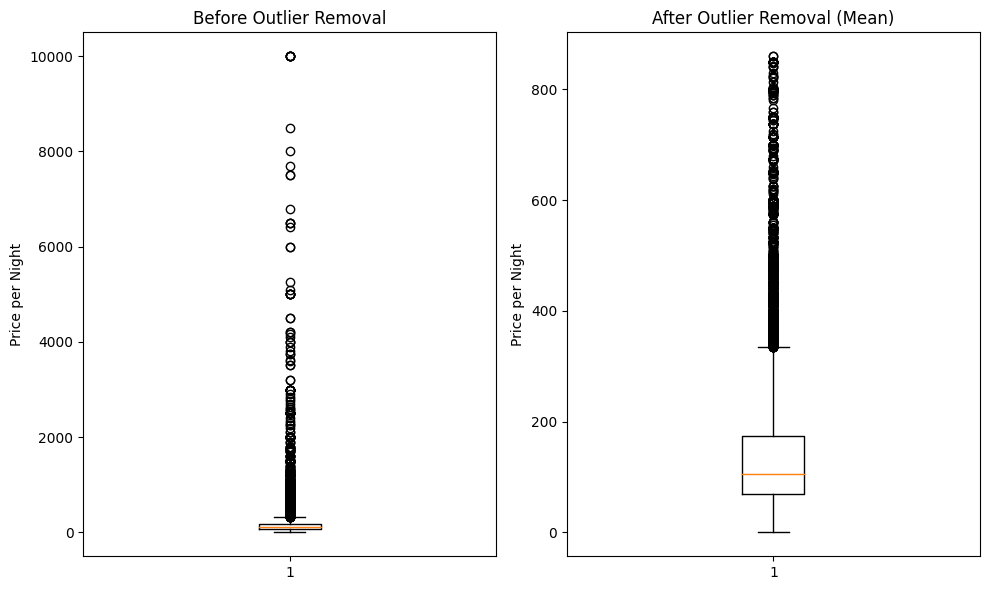

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file
df = pd.read_csv("C:\\Users\\Arin\\Desktop\\aaiml\\CSCN8000-lab-submissions\\practical_labs\\AB_NYC_2019.csv")

# Calculate the mean and standard deviation of the price per night
mean_price = df['price'].mean()
std_price = df['price'].std()

# Define the upper and lower bounds as 3 standard deviations from the mean
lower_bound = mean_price - 3 * std_price
upper_bound = mean_price + 3 * std_price

# Remove outliers based on price per night
df_clean_mean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Visualize box plots before and after outlier removal
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df['price'])
plt.title('Before Outlier Removal')
plt.ylabel('Price per Night')

plt.subplot(1, 2, 2)
plt.boxplot(df_clean_mean['price'])
plt.title('After Outlier Removal (Mean)')
plt.ylabel('Price per Night')

plt.tight_layout()
plt.show()


### Outlier removal using median

Text(0, 0.5, 'Price per Night')

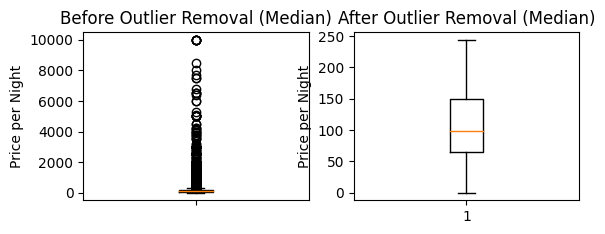

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the CSV file
df = pd.read_csv("C:\\Users\\Arin\\Desktop\\aaiml\\CSCN8000-lab-submissions\\practical_labs\\AB_NYC_2019.csv")

# Calculate the median and median absolute deviation (MAD) of the price per night
median_price = df['price'].median()
mad_price = np.median(np.abs(df['price'] - median_price))

# Define the upper and lower bounds as 3 median absolute deviations from the median
lower_bound_median = median_price - 3 * mad_price
upper_bound_median = median_price + 3 * mad_price

# Remove outliers based on price per night using the median-based approach
df_clean_median = df[(df['price'] >= lower_bound_median) & (df['price'] <= upper_bound_median)]

# Visualize box plot for the median-based approach
plt.subplot(2, 2, 1)
plt.boxplot(df['price'])
plt.title('Before Outlier Removal (Median)')
plt.ylabel('Price per Night')
plt.xticks([1], [''])

plt.subplot(2, 2, 2)
plt.boxplot(df_clean_median['price'])
plt.title('After Outlier Removal (Median)')
plt.ylabel('Price per Night')
plt.xticks([1], [''])

### Outlier removal using percentiles

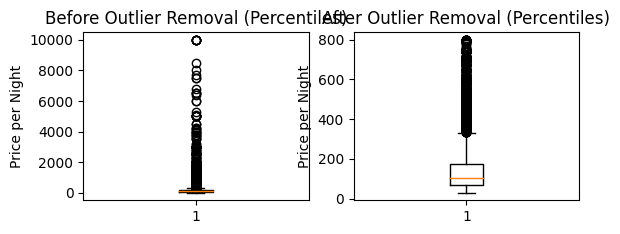

In [45]:
import pandas as pd

# Load the dataset from the CSV file
df = pd.read_csv("C:\\Users\\Arin\\Desktop\\aaiml\\CSCN8000-lab-submissions\\practical_labs\\AB_NYC_2019.csv")

# Define the lower and upper percentiles to keep
lower_percentile = 0.01
upper_percentile = 0.99

# Calculate the lower and upper bounds based on the defined percentiles
lower_bound = df['price'].quantile(lower_percentile)
upper_bound = df['price'].quantile(upper_percentile)

# Remove outliers based on price per night
df_clean_percentile = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Visualize box plot for the percentile-based approach
plt.subplot(2, 2, 3)
plt.boxplot(df['price'])
plt.title('Before Outlier Removal (Percentiles)')
plt.ylabel('Price per Night')

plt.subplot(2, 2, 4)
plt.boxplot(df_clean_percentile['price'])
plt.title('After Outlier Removal (Percentiles)')
plt.ylabel('Price per Night')

plt.show()